#Importando os dados

Utilizaremos a biblioteca pandas para importar e fazer a importação dos dados.

In [22]:
import pandas as pd

In [67]:
cardio_Data = pd.read_csv('./EchoData.data')

A seguir, iremos gerar a tabela dos dados oferecidos pelo arquivo, onde:
- **STime**: Survival
- **SAlive**: Still alive
- **Age@HA**: Age at heart attack
- **P_Effusion**: Pericardial effusion
- **FShortening**: Fractional shortening
- **EPSS**: E-point septal separation
- **LVDD**: Left ventricular end-diastolic dimension
- **WMScore**: Wall motion score
- **WMIndex**: Wall motion index

São os atributos descritos no relatório.

In [3]:
cardio_Data

,STime,SAlive,Age@HA,P_Effusion,FShortening,EPSS,LVDD,WMScore,WMIndex,Mult,Name,Group,Alive_at1
0,11.0,0,71.0,0,0.260,9.000,4.600,14.0,1.000,1.000,name,1.0,0.0
1,19.0,0,72.0,0,0.380,6.000,4.100,14.0,1.700,0.588,name,1.0,0.0
2,16.0,0,55.0,0,0.260,4.000,3.420,14.0,1.000,1.000,name,1.0,0.0
3,57.0,0,60.0,0,0.253,12.062,4.603,16.0,1.450,0.788,name,1.0,0.0
4,19.0,1,57.0,0,0.160,22.000,5.750,18.0,2.250,0.571,name,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,7.5,1,64.0,0,0.240,12.900,4.720,12.0,1.000,0.857,name,NaN,NaN
127,41.0,0,64.0,0,0.280,5.400,5.470,11.0,1.100,0.714,name,NaN,NaN
128,36.0,0,69.0,0,0.200,7.000,5.050,14.5,1.210,0.857,name,NaN,NaN
129,22.0,0,57.0,0,0.140,16.100,4.360,15.0,1.360,0.786,name,NaN,NaN


Desses dados, apenas nos interessa o *tempo sobrevivido*, a *idade do primeiro ataque cardíaco*, o *EPSS* e o *LVDD* como parâmetros do **Classificador Ingênuo de Bayes**. 

Além disso, pretendemos classficar duas classes: 
- A pessoa morre dentro do STime.
- A pessoa não morre dentro do STime.

#Análise de dados

##Dados gerais

Resumo dos dados de interesse:
- STime

In [8]:
cardio_Data['STime'].describe()

count    130.000000
mean      22.182923
std       15.858267
min        0.030000
25%        7.875000
50%       23.500000
75%       33.000000
max       57.000000
Name: STime, dtype: float64

- EPSS

In [9]:
cardio_Data['EPSS'].describe()

count    117.000000
mean      12.164769
std        7.370159
min        0.000000
25%        7.000000
50%       11.000000
75%       16.100000
max       40.000000
Name: EPSS, dtype: float64

- LVDD

In [10]:
cardio_Data['LVDD'].describe()

count    121.000000
mean       4.763157
std        0.810013
min        2.320000
25%        4.230000
50%        4.650000
75%        5.300000
max        6.780000
Name: LVDD, dtype: float64

- Idade no primeiro infarto

In [13]:
cardio_Data['Age@HA'].describe()

count    126.000000
mean      62.813722
std        8.342110
min       35.000000
25%       57.000000
50%       62.000000
75%       67.750000
max       86.000000
Name: Age@HA, dtype: float64

##Visualização gráfica dos atributos

### Dados Faltantes

Utilizando a biblioteca *seaborn* cosneguimos criar um mapa de calor para identificar os dados faltantes no dataset.

Os dados nulos são mostrados como áreas em branco.

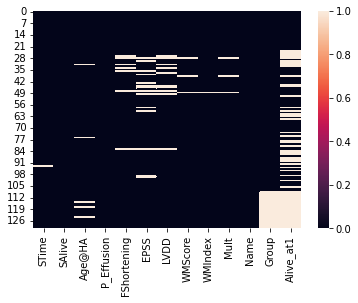

In [56]:
import seaborn as sns


sns.heatmap(cardio_Data.isnull());

###Histograma de todos os atributos

In [ ]:
cardio_Data.hist(bins = 30, figsize = (20,20), color = 'b');

### Distribuição dos atributos mais importantes

In [ ]:
sns.distplot(cardio_Data['STime']);

In [ ]:
sns.distplot(cardio_Data['Age@HA']);

In [ ]:
sns.distplot(cardio_Data['EPSS']);

In [ ]:
sns.distplot(cardio_Data['LVDD']);

### Tabela de correlação dos dados

Aqui podemos ver como os dados se correlacionam entre si e com o atributo SAlive. Assim podemos ter uma ideia de cada atributo em relação à classe, vivo ou morto após o primeiro infarto.

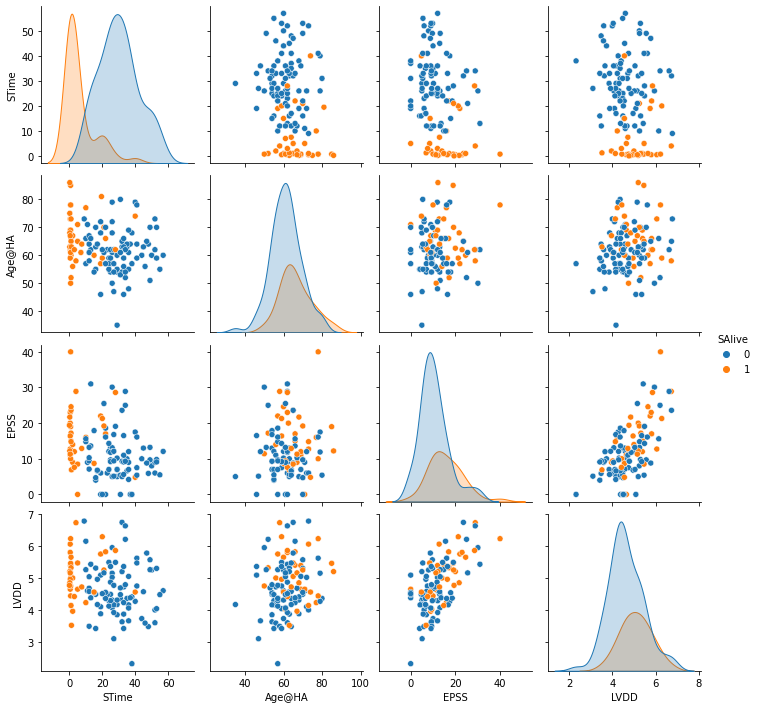

In [77]:
correlation_Data = cardio_Data.drop(['P_Effusion','FShortening','WMScore','WMIndex','Mult','Name','Group','Alive_at1'], axis = 1)
sns.pairplot(correlation_Data, hue = 'SAlive')

### Análise

Com essa análise, conseguimos perceber que boa parte dos atributos tem distribuições normais, principalmente os atributos que nos interessa para o treinamento do Classificador Ingênuo de Bayes. 

Isso nos permite usar um algoritmo baseado numa distribuição Gaussiana para criar o classificador, além de podermos fazer testes de hipótese e outras ciências de dados.

#Algorítmo Naïve Bayes

Para podermos classificar se uma pessoa vai morrer ou não, precisamos fazer o pré processamento dos dados mas antes, é necessário separar os dados para treinamento e teste. Na próxima célula serão reservados 70% dos dados para treinamento e o restante para testes.

In [34]:
cardio_Training = pd.read_csv('./EchoTraining.data')
cardio_Tests = pd.read_csv('./EchoTests.data')

Aqui separamos apenas os dados de interesse, que são:

- STime
- Age@HA
- EPSS
- LVDD

, respectivamente.

In [38]:
x_predictor = cardio_Training.iloc[:, [0,2,5,6]].values # Vetor que será usado para treinar o classficador

X_Tests = cardio_Tests.iloc[:, [0,2,5,6]].values # Vetor que será usado para testar o classficador

In [39]:
y_class = cardio_Training.iloc[:,1].values # Vetor da classficação, que será usado para treinamento do classifcador

Y_Tests = cardio_Tests.iloc[:,1].values # 'Gabarito' do teste

- Pré processamento dos dados, para treinamento.

In [40]:
from sklearn.preprocessing import LabelEncoder

label_Enconder_STime = LabelEncoder()
label_Enconder_Age = LabelEncoder()
label_Enconder_EPSS = LabelEncoder()
label_Enconder_LVDD = LabelEncoder()

#Para o previsor
x_predictor[:,0] = label_Enconder_STime.fit_transform(x_predictor[:,0])
x_predictor[:,1] = label_Enconder_Age.fit_transform(x_predictor[:,1])
x_predictor[:,2] = label_Enconder_EPSS.fit_transform(x_predictor[:,2])
x_predictor[:,3] = label_Enconder_LVDD.fit_transform(x_predictor[:,3])

#Para os testes
X_Tests[:,0] = label_Enconder_STime.fit_transform(X_Tests[:,0])
X_Tests[:,1] = label_Enconder_STime.fit_transform(X_Tests[:,1])
X_Tests[:,2] = label_Enconder_STime.fit_transform(X_Tests[:,2])
X_Tests[:,3] = label_Enconder_STime.fit_transform(X_Tests[:,3])

É possível visualizar como cada vetor ficou depois do processamento.

In [ ]:
x_predictor

In [ ]:
X_Tests

- Treinamento do algoritmo

In [43]:
from sklearn.naive_bayes import GaussianNB

naive_Echo = GaussianNB() 

naive_Echo.fit(x_predictor,y_class)

GaussianNB()

###Visualização das classes

In [44]:
naive_Echo.classes_

array([0, 1])

- Número de amostras por classe

In [45]:
naive_Echo.class_count_

array([57., 34.])

- Proporção de cada classe

In [46]:
naive_Echo.class_prior_

array([0.62637363, 0.37362637])

###Previsão do classficador:

In [57]:
preview = naive_Echo.predict(X_Tests)
print(preview)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
40


###Tabela de Confusão

Como já temos o vetor de previsões obtido pelo algoritmo, podemos agora criar uma matriz de confusão, que nos permite visualizar os erros e acertos, assim como a acurácia do algoritmo.

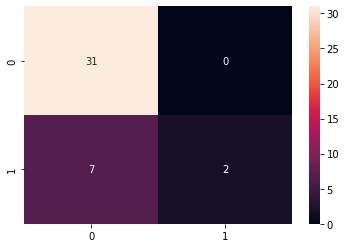

In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

map = confusion_matrix(Y_Tests, preview) #Gerando a matriz de confusão

sns.heatmap(map,annot=True)

In [55]:
naive_Echo.score(X_Tests, Y_Tests)

0.825

###Segundo teste


Esse segundo teste consiste em inverter a proporção dos dados destinados a treinamento e testes, visando comparar a diferença na acurácia do algorítmo.

Nesse caso, serão destinados apenas 30% para o treino do algoritmo e o resto para os testes.

In [ ]:
naive_Echo2 = GaussianNB()
naive_Echo2.fit(X_Tests, Y_Tests)
preview = naive_Echo.predict(x_predictor)
print(preview)


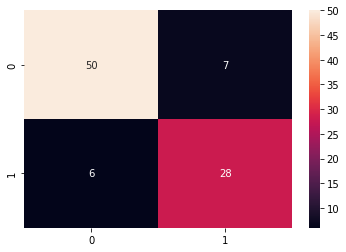

In [59]:
map2 = confusion_matrix(y_class, preview)

sns.heatmap(map2,annot=True)

In [60]:
naive_Echo.score(x_predictor, y_class)

0.8571428571428571